# Домашнее задание "Продвинутая оптимизация"

## Задание

При фиксированном **seed=42** поэкспериментируйте с параметрами алгоритма **differential_evolution: strategy, popsize, mutation**.

Постройте графики количества итераций **(nit)** оптимизации функции **ackley** от значения параметра.

In [1]:
import numpy as np
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]

result = differential_evolution(ackley, bounds, seed=42)
result

 message: Optimization terminated successfully.
 success: True
     fun: 4.440892098500626e-16
       x: [ 0.000e+00  0.000e+00]
     nit: 90
    nfev: 2793

### Строим график зависимости количества итераций от значения парамерта **strategy**

In [5]:
strategy_list = ['best1bin', 'best1exp', 'rand1exp', 'randtobest1exp', 'currenttobest1exp', 'best2exp',
                 'rand2exp', 'randtobest1bin', 'currenttobest1bin', 'best2bin', 'rand2bin', 'rand1bin']
nit_list = []
for s in strategy_list:
    res = differential_evolution(ackley, bounds, seed=42, strategy=s)
    nit_list.append(res.nit)

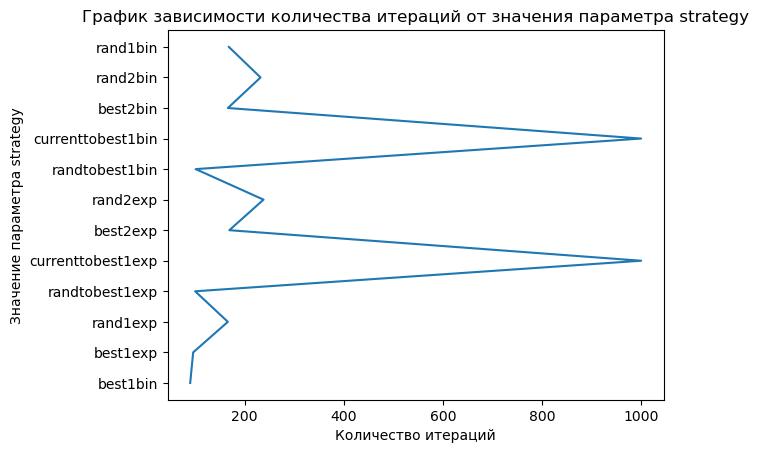

In [11]:
plt.plot(nit_list, strategy_list)
plt.xlabel("Количество итераций")
plt.ylabel("Значение параметра strategy")
plt.title("График зависимости количества итераций от значения параметра strategy")
plt.show()

### Строим график зависимости количества итераций от значения парамерта **popsize**

In [27]:
nit_list = []
for s in range(1, 100):
    res = differential_evolution(ackley, bounds, seed=42, popsize=s)
    nit_list.append(res.nit)

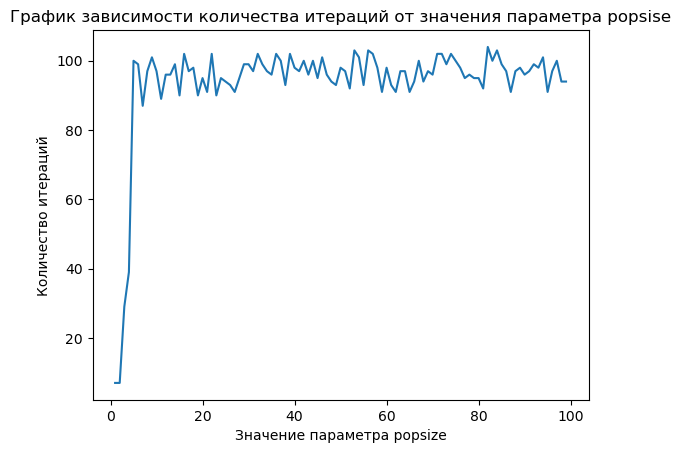

In [28]:
plt.plot(list(range(1, 100)), nit_list)
plt.xlabel("Значение параметра popsize")
plt.ylabel("Количество итераций")
plt.title("График зависимости количества итераций от значения параметра popsise")
plt.show()

### Строим график зависимости количества итераций от значения парамерта **mutation**

In [31]:
nit_list = []
for s in np.arange(0, 2, 0.1):
    res = differential_evolution(ackley, bounds, seed=42, mutation=s)
    nit_list.append(res.nit)

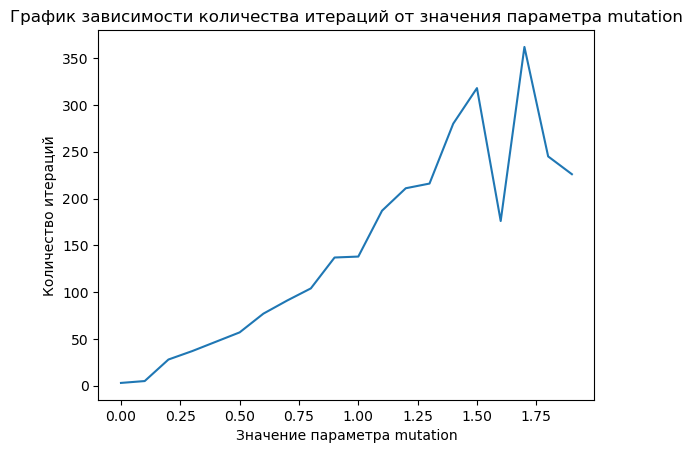

In [34]:
plt.plot(np.arange(0, 2, 0.1), nit_list)
plt.xlabel("Значение параметра mutation")
plt.ylabel("Количество итераций")
plt.title("График зависимости количества итераций от значения параметра mutation")
plt.show()

## Дополнительное задание

Поэкспериментируйте с параметрами и оптимизацией через **minimize**:

In [35]:
from scipy.optimize import minimize

x0 = [0,0]

result_m = minimize(ackley, x0,  method='Nelder-Mead')
result_m

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 4.440892098500626e-16
             x: [ 0.000e+00  0.000e+00]
           nit: 8
          nfev: 17
 final_simplex: (array([[ 0.000e+00,  0.000e+00],
                       [-1.607e-05, -8.453e-06],
                       [-1.404e-06, -3.113e-05]]), array([ 4.441e-16,  5.136e-05,  8.816e-05]))

In [ ]:
result_m = minimize(ackley, x0,  method='Nelder-Mead', )
result_m

In [38]:
x0 = [10, 10]

result_m = minimize(ackley, x0,  method='Powell')
result_m

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 17.291927103406667
       x: [ 9.995e+00  9.995e+00]
     nit: 1
   direc: [[ 1.000e+00  0.000e+00]
           [ 0.000e+00  1.000e+00]]
    nfev: 25

In [41]:
x0 = [1, 1]

result_m = minimize(ackley, x0,  method='BFGS')
result_m

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 2.2288034973172444e-08
        x: [-5.572e-09 -5.572e-09]
      nit: 1
      jac: [ 5.669e-01  5.669e-01]
 hess_inv: [[ 9.670e-01 -3.297e-02]
            [-3.297e-02  9.670e-01]]
     nfev: 216
     njev: 68